In [1]:
class Action:
    def __init__(self, action, prev=None):
        self.prev = prev
        self.action = action
        
    def __repr__(self):
        if self.action == 3:
            return str(3)
        else:
            return str(2)
        
class Cell:
    def __init__(self, actions=[]):
        self.actions = actions
        
    def __repr__(self):
        traj = ''
        action = self.actions[-1]
        while action.prev:
#             traj += f'{str(action)} '

            traj = str(action) + ' ' + traj
            action = action.prev
        return traj
    
    def full_traj(self):
        actions = []
        a = self.actions[-1]
        while a.prev:
            actions = [a.action] + actions
            a = a.prev
        actions = [a.action] + actions
        return actions

In [2]:
import random
actions = []
prev_action = None
# actions.append(prev_action)
for _ in range(4):
    action = Action(random.randint(2, 3), prev=prev_action)
    actions.append(action)
    prev_action = action

In [3]:
actions

[2, 3, 3, 3]

In [4]:
A = Cell(actions)

actions = []
# prev_action = Action(3)
# actions.append(prev_action)
for _ in range(6):
    action = Action(random.randint(2, 3), prev=prev_action)
    actions.append(action)
    prev_action = action
    
B = Cell(actions)

In [5]:
actions

[2, 2, 2, 3, 3, 3]

In [6]:
B.full_traj()

[2, 3, 3, 3, 2, 2, 2, 3, 3, 3]

In [7]:
A

3 3 3 

In [117]:
B

-> <- -> <- <- -> <- <- -> <- 

In [96]:
B.actions

[<-, ->, ->, <-, <-, ->, ->]

In [2]:
from pathlib import Path

In [9]:
str(path)

'test/folder'

In [7]:
path = Path('test/folder')
path.mkdir(exist_ok=True)

In [3]:
path

PosixPath('experiments')

In [10]:
path / Path(str(fname)).touch()

TypeError: unsupported operand type(s) for /: 'PosixPath' and 'NoneType'

In [5]:
import datetime
fname = datetime.date.today()

In [8]:
print(fname)

2021-11-27


In [12]:
def save(actrep, maxsteps, seed, score, iterations, trajectory):
    time = datetime.datetime.now().strftime("%Y-%m-%d|%H:%M")
    with open(f"experiments/{time}_actrep{actrep}_maxsteps{maxsteps}_seed{seed}.txt", "w") as f:
        f.write('Score: {score}\nNumber of iterations: {iterations}\nTrajectory: {trajectory}')

In [17]:
datetime.datetime.now().strftime("%Y-%m-%d|%H:%M")

'2021-11-27|17:17'

In [2]:
path = Path('experiments')

In [23]:
# Create folder with format date_experimentname
experiment_name = 'idk'
date = datetime.datetime.now().strftime("%Y-%m-%d")
p = Path(f'experiments/{date}_{experiment_name}')
p.mkdir()

In [28]:
l = p / '2021-11-27_actrep0.0_maxsteps100_seed0_.txt'

In [29]:
p


PosixPath('experiments/2021-11-28_idk')

In [32]:
condition = lambda x: x < 2000

In [33]:
k = 1200
condition(k)

True

In [7]:
np.linspace(-3, 3, 1)

array([-3.])

In [ ]:
np.l

In [475]:
# 5 runs
import numpy as np
n = 100000
noise = np.random.normal(0, 1, n)
x = np.linspace(1, n, n)

In [476]:
n_runs = 5
ys = np.array([0.01*x*np.ones(n) + np.random.normal(0, 300, n) for _ in range(n_runs)])

In [477]:
n_samples = 1000
bootstraps = np.zeros((n_samples, n))
for i in range(n_samples):
    sample_idxs = np.random.randint(n_runs, size=n_runs)
    sample = ys[sample_idxs]
    bootstraps[i, :] = sample.mean(axis=0)
stats = []
for N in range(n):
    bootstrap_samples = bootstraps[:, N]
    lb = round(sorted(bootstrap_samples)[24], 2)
    mean = round(sorted(bootstrap_samples)[499], 2)
    ub = round(sorted(bootstrap_samples)[974], 2)
    stats.append(Stat(lb, mean, ub))

In [478]:
ys = np.array([stat.mean for stat in stats])
errors = np.array([stat.mean - stat.lb for stat in stats])

In [479]:
# https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = []
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed


(0.0, 1000.0)

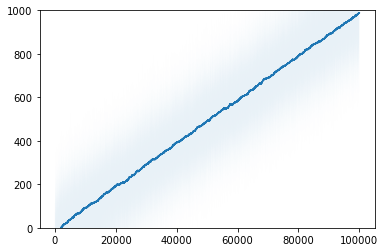

In [482]:
import matplotlib.pyplot as plt
plt.plot(x, smooth(ys, 0.999))
plt.fill_between(x, smooth(ys, 0.999) - errors, smooth(ys, 0.999) + errors, alpha=0.1)
ax = plt.gca()
ax.set_ylim([0, 1000])

In [164]:
from collections import namedtuple
Stat = namedtuple('Stat', 'lb mean ub')

In [60]:
bootstraps

array([[15375.31789619, 15135.79778617, 14874.55065677, ...,
        15128.33893681, 15380.44634175, 15616.36090954],
       [15385.18691682, 15132.24872232, 14881.74835218, ...,
        15130.90622932, 15375.43964857, 15613.39851431],
       [15378.71934705, 15132.44511691, 14880.00215701, ...,
        15128.7159006 , 15376.32496046, 15615.03043323],
       ...,
       [15379.12743476, 15133.39192571, 14879.01269859, ...,
        15126.09196128, 15379.4461752 , 15612.10732324],
       [15385.0878003 , 15132.45427374, 14878.23748958, ...,
        15127.95202257, 15383.81557908, 15612.92058457],
       [15378.4539942 , 15123.87032498, 14881.22628489, ...,
        15131.13128861, 15381.66786964, 15625.57088395]])

In [61]:
t0 = bootstraps[:, 0]

In [62]:
sorted(t0)[24], sorted(t0)[499], sorted(t0)[974]

(15369.357530654746, 15378.620230532217, 15385.087800298332)

In [13]:
class Cell:
    def __init__(self, score, length):
        self.score, self.length = score, length
        
    def __eq__(self, other):
        return self.score == other.score and self.length == other.length
    
    def __lt__(self, other):
        return (-self.score, self.length) < (-other.score, other.length)
    
    def __repr__(self):
        return f'Cell(score={self.score}, length={self.length})'

In [14]:
cells = [Cell(10, 25), Cell(10, 8), Cell(7, 5)]

In [12]:
sorted(cells, reverse=True)

[Cell(score=10, length=8), Cell(score=10, length=25), Cell(score=7, length=5)]

In [17]:
import numpy as np
np.random.choice(cells)

Cell(score=7, length=5)

In [15]:
sorted(cells)


[Cell(score=10, length=8), Cell(score=10, length=25), Cell(score=7, length=5)]

In [59]:
import numpy as np
k = 20
np.random.geometric(1/k)

1

In [2]:
!pip install p_tqdm

In [1]:
from p_tqdm import p_map


ModuleNotFoundError: No module named 'p_tqdm'

In [4]:
from p_tqdm import p_map
import time

def _foo(my_number):
   square = my_number * my_number
   time.sleep(1)
   return square 

if __name__ == '__main__':
   r = p_map(_foo, list(range(0, 30)))

ModuleNotFoundError: No module named 'p_tqdm'